# Objectivos C1-C4

## Recolha dos dados 

Os dados usados para cumprir estes objectivos foram gravados no recinto da Active Space dia 7/12/2020. Consistem em gravações de ~5s a ~30fps a diversas distâncias de uma parede ou vidro em condições de iluminação semelhantes.

Para obter um número elevado de medidas analisou-se uma ROI (Região de Interesse) de 25x25 píxeis, onde se admitiu que todos os píxeis teriam o mesmo valor. Para garantir que a aproximação é válida analisou-se para os casos de 20cm, 1m e 10m apenas o pixel central e compararam-se os resultados (criando uma espécie de situação de controlo).


In [136]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [137]:
#Data Loading
path = "../Files/"
all_files = [file for file in listdir(path) if isfile(join(path, file))] # Adiciona o nome de todos os ficheiros numa lista
col_names = [n.split(".")[0] for n in all_files] # cria os nomes das colunas do Dataframe

df_from_each_file = (pd.read_csv(path+f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True, axis=1)

concatenated_df.columns = col_names

In [138]:
#Data pre-processing


def standardizeData(df):
    # copy the dataframe
    df_std = df.copy()
    
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    

std_df = standardizeData(concatenated_df) #DataFrame com os dados "standardizados"

#calcular as medias e desvio padrao dos dados

media_3m = concatenated_df["3m-parede"].mean()
std_3m = concatenated_df["3m-parede"].std()

media_5m = concatenated_df["5m-parede"].mean()
std_5m = concatenated_df["5m-parede"].std()

media_7m = concatenated_df["7m-parede"].mean()
std_7m = concatenated_df["7m-parede"].std()

media_7m_sl = concatenated_df["7m-sl-parede"].mean()
std_7m_sl = concatenated_df["7m-sl-parede"].std()

media_9m = concatenated_df["9m-parede"].mean()
std_9m = concatenated_df["9m-parede"].std()

#Para o vidro

media_20cm_vidro= concatenated_df["20cm-vidro"].mean()
std_20cm_vidro= concatenated_df["20cm-vidro"].std()

media_1m_vidro= concatenated_df["1m-vidro"].mean()
std_1m_vidro= concatenated_df["1m-vidro"].std()

media_2m_vidro= concatenated_df["2m-vidro"].mean()
std_2m_vidro= concatenated_df["2m-vidro"].std()

media_5m_vidro= concatenated_df["5m-vidro"].mean()
std_5m_vidro= concatenated_df["5m-vidro"].std()

media_10m_vidro= concatenated_df["10m-vidro"].mean()
std_10m_vidro= concatenated_df["10m-vidro"].std()


### Controlo a 20cm

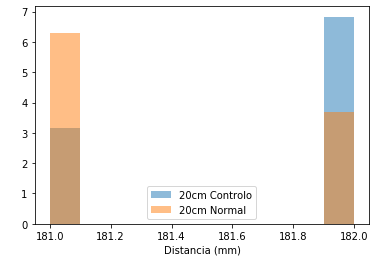

In [139]:
#Situacao Controlo a 20cm

plt.hist(concatenated_df["30cm-control-1px"].dropna(), bins=10, alpha=0.5, density=True, label="20cm Controlo")
plt.hist(concatenated_df["20cm-parede"].dropna(), bins=10, alpha=0.5, density=True, label="20cm Normal")
plt.legend()
plt.ylabel(' ');
plt.xlabel('Distancia (mm)');

media_20cm_control = concatenated_df["30cm-control-1px"].mean()
std_20cm_control = concatenated_df["30cm-control-1px"].std()

media_20cm = concatenated_df["20cm-parede"].mean()
std_20cm = concatenated_df["20cm-parede"].std()



|               | Média (mm)   | Desvio Padrão (mm)|
| ------------- |-------------:|------------------:|
| Controlo      | 181.68       | 0.47              |
| ROI (25x25)   | 181.37       | 0.48              |


### Controlo a 1m

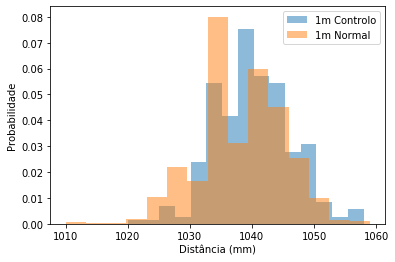

In [140]:
#Situacao Controlo a 1m

plt.hist(concatenated_df["1m-control-1px"].dropna(), bins=15, alpha=0.5, density=True, label="1m Controlo")
plt.hist(concatenated_df["1m-parede"].dropna(), bins=15, alpha=0.5, density=True, label="1m Normal")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distância (mm)');

media_1m_control = concatenated_df["1m-control-1px"].mean()
std_1m_control = concatenated_df["1m-control-1px"].std()

media_1m = concatenated_df["1m-parede"].mean()
std_1m = concatenated_df["1m-parede"].std()


|               | Média (mm)   | Desvio Padrão (mm)|
| ------------- |-------------:|------------------:|
| Controlo      | 1040.0       | 6.29              |
| ROI (25x25)   | 1038.1       | 6.75              |


### Controlo a 10m

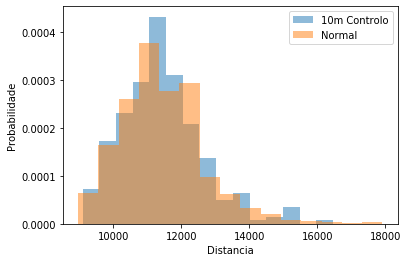

In [141]:
#Situacao Controlo a 10m
plt.hist(concatenated_df["10m-control-1px"].dropna(), bins=15, alpha=0.5, density=True, label="10m Controlo")
plt.hist(concatenated_df["10m-parede"].dropna(), bins=15, alpha=0.5, density=True, label="Normal")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distância');

media_10m_control = concatenated_df["10m-control-1px"].mean()
std_10m_control = concatenated_df["10m-control-1px"].std()

media_10m = concatenated_df["10m-parede"].mean()
std_10m = concatenated_df["10m-parede"].std()



|               | Média (mm)   | Desvio Padrão (mm)|
| ------------- |-------------:|------------------:|
| Controlo      | 11444.4      | 1226.34           |
| ROI (25x25)   | 11452.5      | 1224.38           |


Em todos os casos temos valores semelhantes, por isso a aproximação é válida

## Superficies opacas


| Valor Real (mm)    | Média (mm)   | Desvio Padrão (mm)|
| ------------------ |-------------:|------------------:|
| 200                | 181.37       | 0.48              |
| 1000               | 1038.1       | 6.75              |
| 3000               | 3153.42      | 78.97             |
| 5000               | 5322.0       | 231.44            |
| 7000               | 7706.77      | 723.22            |
| 9000               | 10017.78     | 732.35            |
| 10000              | 11452.5      | 1224.38           |

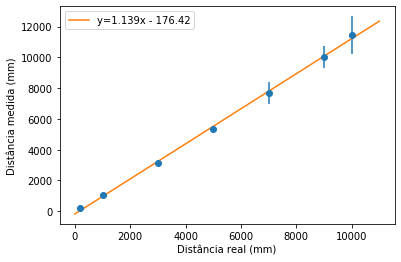

In [142]:
x = np.array([200, 1000, 3000, 5000, 7000, 9000, 10000])
y = np.array([181.37, 1038.1, 3153.42, 5322, 7707.77, 10017.78, 11452.5])

ey = np.array([0.48, 6.75, 78.97, 231.44, 723.22, 732.35, 1224.38])


def inversion(array1):
  return 1 / (array1)

w = inversion(x) # pesos para o fit (Gaussian incertanty 1/sigma)

m, b = np.polyfit(x, y, 1)

t = np.linspace(0.0, 11000, 110)
s = m*t+b


plt.errorbar(x, y, ey, linestyle='None', marker='o')
plt.plot(t,s, label="y=1.139x - 176.42")
plt.legend()
plt.ylabel('Distância medida (mm)');
plt.xlabel('Distância real (mm)');

plt.show()

Como os dados se ajustam bem a uma reta é possível calibrar os dados obter melhores resultados e até medir distâncias superiores à prevista na Datasheet. No entanto não sabemos como é que as condições de iluminação afetam o declive da reta de calibração.

### Condições de Iluminação


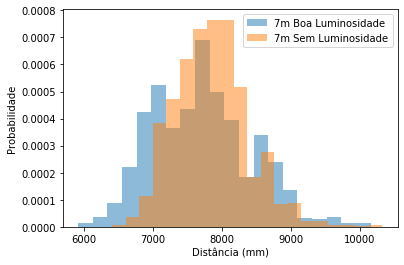

In [143]:
# Condições de iluminação
plt.hist(concatenated_df["7m-parede"].dropna(), bins=20, alpha=0.5, density=True, label="7m Boa Luminosidade")
plt.hist(concatenated_df["7m-sl-parede"].dropna(), bins=20, alpha=0.5, density=True, label="7m Sem Luminosidade")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distância (mm)');

|                          | Média (mm)   | Desvio Padrão (mm)|
| ------------------------ |-------------:|------------------:|
| 7m Boa Luminosidade      | 7706.77      | 723.22            |
| 7m Sem Luminosidade      | 7839.98      | 523.96            |

É curioso ver que o desvio padrão em condições de iluminação seja menor.

## Superficies transparentes


| Valor Real (mm)    | Média (mm)   | Desvio Padrão (mm)|
| ------------------ |-------------:|------------------:|
| 200                | 217.76       | 15.22             |
| 1000               | 2425.67      | 19.83             |
| 2000               | 1562.53      | 1883.25           |
| 5000               | 23895.21     | 17785.4           |
| 10000              | -1416.40     | 3784.53           |

